In [27]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [15]:
#read in iris as pandas DF
iris = pd.read_table("iris.txt", sep=",")

#make sure the data read in correctly by examining first 5 rows...
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
#...and last five rows
iris.tail()

#Note we have 150 observations with 5 columns.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [18]:
#Check the summary stats for the numeric variables and set include to all to also include categorical variables.
iris.describe(include="all")

#The scaling of the 4 numeric variables is obviously very different, especially looking at lengths vs widths. 
# Disparity in ranges might need to be normalized in any modeling techniques.

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


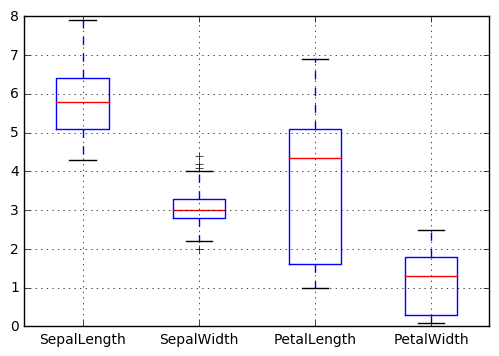

In [41]:
#Boxplot of iris
iris.boxplot(return_type="axes")
plt.show()

# The boxplot confirms that the distribution for lengths are higher than those of the widths. They are also much wider.

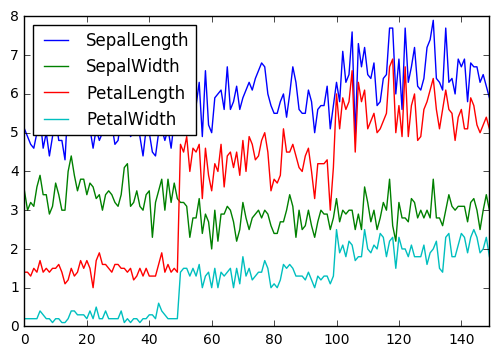

In [108]:
#line plot
iris.plot()

#place legend in upper left where there is fewest data
plt.legend(loc="upper left")
plt.show()

# This line plot doesn't really show anything of value since nothing in the iris dataset is measuring time. All it is 
# really showing is the progression of each variable through each row in the dataset. 

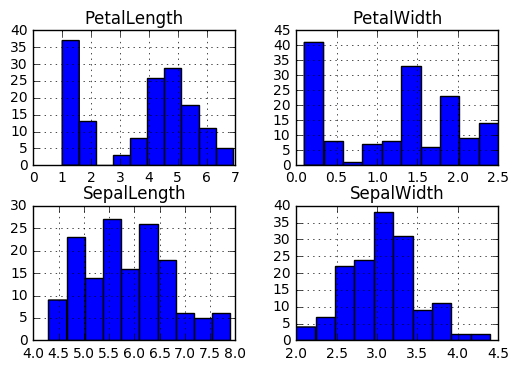

In [49]:
#Create histogram of Iris numeric variables
iris.hist()
plt.show()

#Sepal width is the only variable with any semblance of a central distribution. Petal Width has a large amount of data from 1-1.5,
#but does have some central tendencies between 3-7. Petal width and sepal length are far more spread out.

In [65]:
#create new DF to group Iris by species type
iris_group = iris.groupby(iris["Species"])

#post summary stats by each species
iris_group.describe()

# We see there is an equal count of 50 in each species type. There is a massive difference in the Petal Lengths with Virginica 
# and versicolor having 3-4x the average value of setosa. The other variables all have their disaprities but are generally in 
# a much closer range.

PetalLength  PetalWidth  SepalLength  SepalWidth
Species                                                                
Iris-setosa     count    50.000000   50.000000    50.000000   50.000000
                mean      1.464000    0.244000     5.006000    3.418000
                std       0.173511    0.107210     0.352490    0.381024
                min       1.000000    0.100000     4.300000    2.300000
                25%       1.400000    0.200000     4.800000    3.125000
                50%       1.500000    0.200000     5.000000    3.400000
                75%       1.575000    0.300000     5.200000    3.675000
                max       1.900000    0.600000     5.800000    4.400000
Iris-versicolor count    50.000000   50.000000    50.000000   50.000000
                mean      4.260000    1.326000     5.936000    2.770000
                std       0.469911    0.197753     0.516171    0.313798
                min       3.000000    1.000000     4.900000    2.000000
                25%       4.000000    1.200000     5.600000    2.525000
                50%       4.350000    1.300000     5.900000    2.800000
                75%       4.600000    1.500000     6.300000    3.000000
                max       5.100000    1.800000     7.000000    3.400000
Iris-virginica  count    50.000000   50.000000    50.000000   50.000000
                mean      5.552000    2.026000     6.588000    2.974000
                std       0.551895    0.274650     0.635880    0.322497
                min       4.500000    1.400000     4.900000    2.200000
                25%       5.100000    1.800000     6.225000    2.800000
                50%       5.550000    2.000000     6.500000    3.000000
                75%       5.875000    2.300000     6.900000    3.175000
                max       6.900000    2.500000     7.900000    3.800000

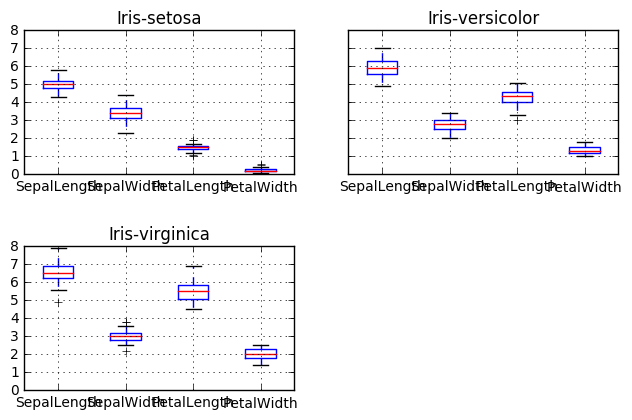

In [131]:
#boxplot of the summary stats of each species
iris_group.boxplot(return_type="axes")

#change the spacing so at teh very least the titles won't be on top of each other
plt.subplots_adjust(bottom=0, left=.01, right=1, top=.90, hspace=.5)



#show the plot
plt.show()

# The petal length is consistently the highest value. Notice the sepal width is lower than petal length for only setosa, who
# also have abnormally low petal width.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010412FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011909630>]], dtype=object)

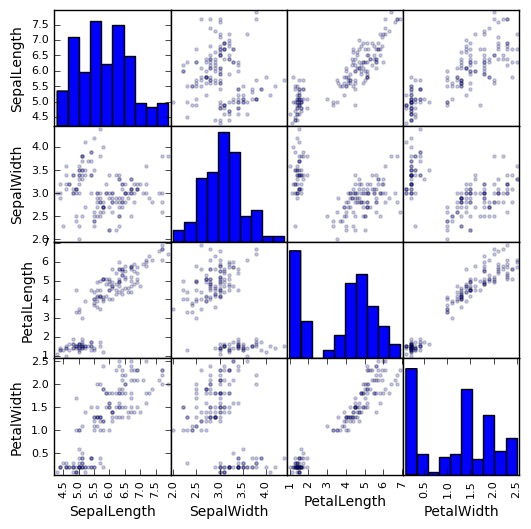

In [124]:
#scatterplot matrix for iris dataset
scatter_matrix(iris, alpha=0.2, figsize=(6, 6))

#There looks to be very high correlation between sepal length/petal length, sepal length/petal width, and 
# petal length/petal width.
# There looks to be very little correlation between sepal length/sepal width, sepal width/petal length, 
# and petal width/sepal width.

In [ ]:
#Given an iris flower's petal length, petal width, sepal length, and sepal width, what variable(s) should we 
# look at if we wanted to predict the species of the flower?

# Sepal width has the smallest difference in average between species. All of the other three variables - petal width, petal 
# length, sepal length - all have very dispersed distributions, which likely indicates unique characteristics between species. 
# However, sepal width also is the only variable that has no correlation to any other variable. Therefore, it stands within 
# reason that the sepal length when modeled in conjunction with the other variables will yield significant results in
# evaluating species. So I would say that all of the variable could be used in our classification model.